# 50 Parsing Leapfrog Wells

Leapfrog provides well data in the form of several CSV files. These include a collar file, a survey file, a litho file and an assay file. With GemGIS it is now possible to read in these wells and visualize them. 
<img src="../images/tutorial50_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/50_parsing_leapfrog_wells/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="50_parsing_leapfrog_wells.zip", dirpath=file_path)

## Loading Data

The Leapfrog well data is read in as Pandas DataFrames.

In [2]:
import pandas as pd

litho = pd.read_csv(file_path+'litho.csv')
litho.head()

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,holeid,from,to,Geology
0,UG_034,0.00,24.46,Conglomerate
1,UG_034,24.46,44.01,Arkoses
2,UG_034,44.01,122.29,Quartzitic sandstones
3,UG_034,122.29,140.70,Quartzites
4,UG_034,140.70,180.00,Lower Black shales


In [3]:
collar = pd.read_csv(file_path+'collar.csv', delimiter=';')
collar

,holeid,x,y,z,maxdepth,comment
0,UG_034,12172.83,30799.71,1977.71,180,"underground DH, upwards"
1,RWTHO_006,12628.76,30259.13,2259.59,450,inclined
2,SonicS_006,12012.68,30557.53,2325.53,500,lift


In [4]:
survey = pd.read_csv(file_path+'survey.csv')
survey.head()

,holeid,depth,dip,azimuth
0,UG_034,0,-65.00,20
1,UG_034,180,-65.00,20
2,RWTHO_006,0,55.00,308
3,RWTHO_006,450,55.00,308
4,SonicS_006,0,90.00,20


## Plotting the first well

The first well to be plotted is well ``SonicS_006``. 

In [5]:
survey006 = survey[survey['holeid']=='SonicS_006']
survey006 = survey006.reset_index().drop('index', axis=1)
survey006.head()

,holeid,depth,dip,azimuth
0,SonicS_006,0,90.00,20
1,SonicS_006,10,89.50,20
2,SonicS_006,20,89.00,20
3,SonicS_006,30,88.50,20
4,SonicS_006,40,88.00,20


Getting the coordinates of the well at the surface.

In [6]:
x0 = collar[['x', 'y', 'z']].loc[2].values
x0

array([12012.68053 , 30557.53476 ,  2325.532416])

Creating the DataFrame from which the well paths are created.

In [7]:
df_survey = gg.visualization.create_deviated_borehole_df(df_survey=survey006, position=x0)
df_survey.head()

,holeid,depth,dip,azimuth,depth_bottom,vector,segment_length,X,Y,Z,points
0,SonicS_006,0,90.00,20,10.00,"[[0.36482400173640905], [-0.18285080511417406]...",-10,12012.68,30557.53,2325.53,"[12012.68053, 30557.534760000002, 2325.532416]"
1,SonicS_006,0,90.00,20,10.00,"[[0.36482400173640905], [-0.18285080511417406]...",-10,12009.03,30559.36,2316.40,"[12009.032289982635, 30559.363268051144, 2316...."
2,SonicS_006,10,89.50,20,20.00,"[[0.4078265278090107], [0.014439265532404447],...",-10,12004.95,30559.22,2307.27,"[12004.954024704546, 30559.21887539582, 2307.2..."
3,SonicS_006,20,89.00,20,30.00,"[[0.3509788964265648], [0.2081941003896598], [...",-10,12001.44,30557.14,2298.14,"[12001.44423574028, 30557.136934391925, 2298.1..."
4,SonicS_006,30,88.50,20,40.00,"[[0.2081993903819504], [0.3509757584484337], [...",-10,11999.36,30553.63,2289.01,"[11999.362241836461, 30553.62717680744, 2289.0..."


Creating lines from DataFrame.

In [8]:
lines = gg.visualization.create_lines_from_points(df=df_survey)
lines

PolyData,Information
N Cells,52
N Points,51
X Bounds,"1.200e+04, 1.202e+04"
Y Bounds,"3.054e+04, 3.056e+04"
Z Bounds,"1.869e+03, 2.326e+03"
N Arrays,0


Creating tubes from lines.

In [9]:
tubes = gg.visualization.create_borehole_tube(df=df_survey, line=lines, radius=10)
tubes

PolyData (0x2050be29e80)
  N Cells:	22
  N Points:	1060
  X Bounds:	1.199e+04, 1.203e+04
  Y Bounds:	3.053e+04, 3.057e+04
  Z Bounds:	1.865e+03, 2.330e+03
  N Arrays:	3

Plotting the well.

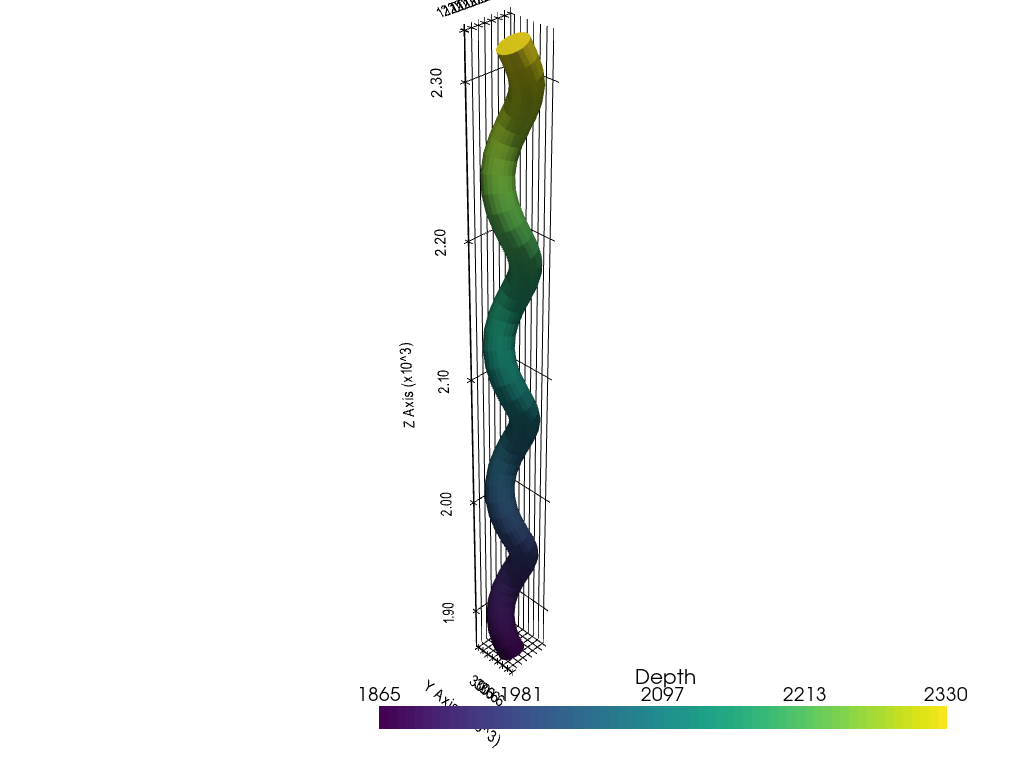

In [10]:
import pyvista as pv

sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

# Adding DEM
p.add_mesh(tubes, scalars='Depth', scalar_bar_args=sargs)


p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,1)
p.show()

## Plotting the second well

The second well that will be plotted is ``RWTHO_006``.

In [11]:
surveyrwth = survey[survey['holeid']=='RWTHO_006']
surveyrwth = surveyrwth.reset_index().drop('index', axis=1)
surveyrwth.head()

,holeid,depth,dip,azimuth
0,RWTHO_006,0,55.00,308
1,RWTHO_006,450,55.00,308


Getting the coordinates of the well at the surface.

In [12]:
x0 = collar[['x', 'y', 'z']].loc[1].values
x0

array([12628.75598, 30259.12988,  2259.59034])

Creating the DataFrame from which the well paths are created.

In [13]:
df_survey = gg.visualization.create_deviated_borehole_df(df_survey=surveyrwth, position=x0)
df_survey

,holeid,depth,dip,azimuth,depth_bottom,vector,segment_length,X,Y,Z,points
0,RWTHO_006,0,55.00,308,450.00,"[[-0.992088794420255], [0.021957082623147627],...",-450,12628.76,30259.13,2259.59,"[12628.75598, 30259.12988, 2259.5903399999997]"
1,RWTHO_006,0,55.00,308,450.00,"[[-0.992088794420255], [0.021957082623147627],...",-450,13075.20,30249.25,2203.97,"[13075.195937489114, 30249.249192819585, 2203...."


Creating lines from DataFrame.

In [14]:
lines = gg.visualization.create_lines_from_points(df=df_survey)
lines

PolyData,Information
N Cells,3
N Points,2
X Bounds,"1.263e+04, 1.308e+04"
Y Bounds,"3.025e+04, 3.026e+04"
Z Bounds,"2.204e+03, 2.260e+03"
N Arrays,0


Creating tubes from lines.

In [15]:
tubes = gg.visualization.create_borehole_tube(df=df_survey, line=lines, radius=10)
tubes

PolyData (0x20511019520)
  N Cells:	22
  N Points:	80
  X Bounds:	1.263e+04, 1.308e+04
  Y Bounds:	3.024e+04, 3.027e+04
  Z Bounds:	2.194e+03, 2.270e+03
  N Arrays:	3

Plotting the well.

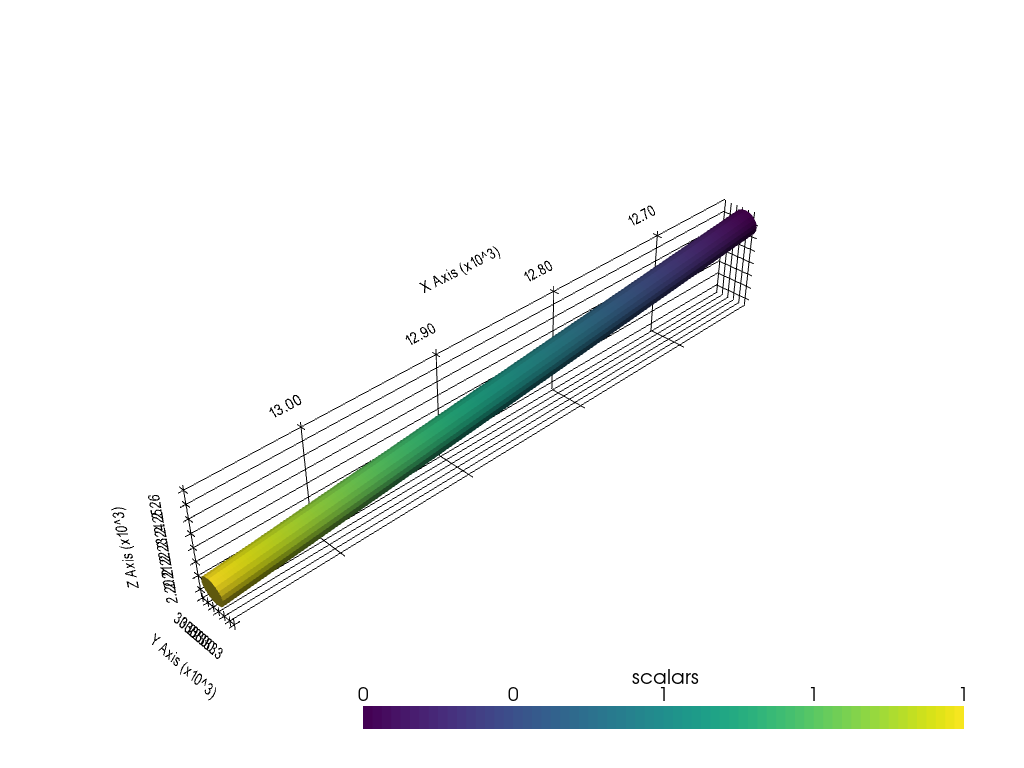

In [16]:
import pyvista as pv

sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

# Adding DEM
p.add_mesh(tubes, scalar_bar_args=sargs)


p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,1)
p.show()

## Creating tubes for all wells

All tubes for all wells can be created with the function ``create_deviated_boreholes_3d(..)``.

In [17]:
tubes, df_groups = gg.visualization.create_deviated_boreholes_3d(df_collar=collar, 
                                                                 df_survey=survey, 
                                                                 min_length=10, 
                                                                 collar_depth='maxdepth', 
                                                                 survey_depth='depth', 
                                                                 index='holeid')
tubes

MultiBlock (0x20511020820)
  N Blocks:	3
  X Bounds:	12003.268, 12641.589
  Y Bounds:	30234.730, 30809.708
  Z Bounds:	1799.074, 2329.613

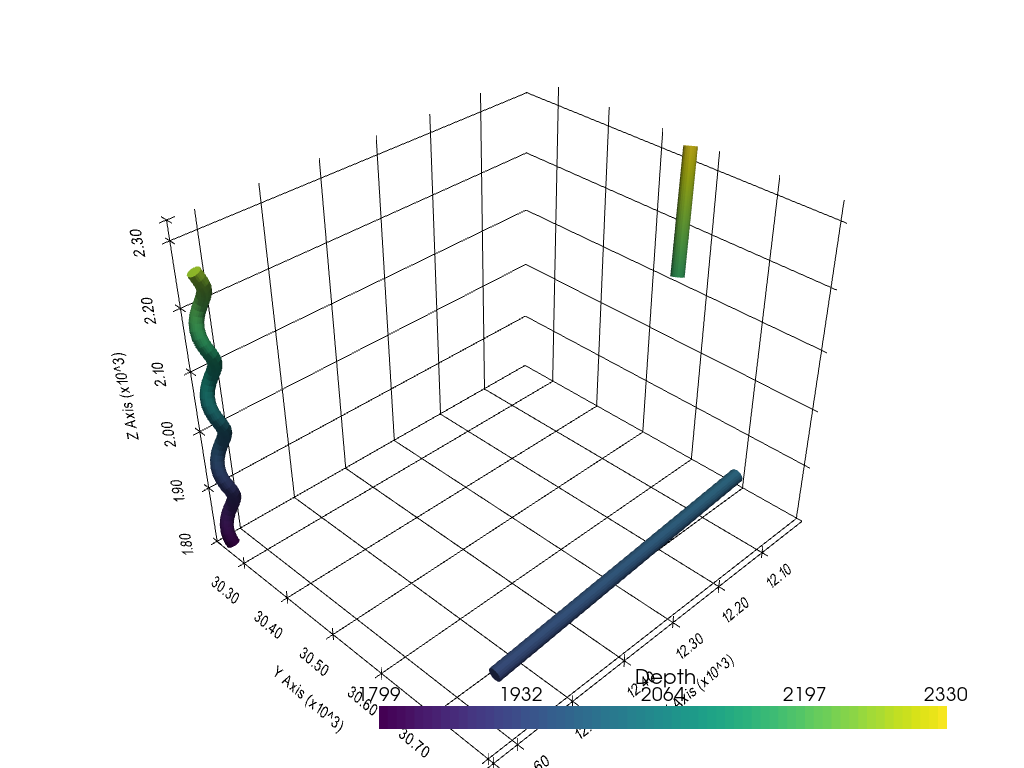

In [18]:
import pyvista as pv

sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

# Adding DEM
p.add_mesh(tubes, scalars='Depth', scalar_bar_args=sargs)


p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,1)
p.show()